## Loan Prediction
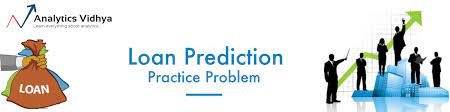



Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



Data Dictionary
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

1. Variable	Description
2. Loan_ID	Unique Loan ID
3. Gender	Male/ Female
4. Married	Applicant married (Y/N)
5. Dependents	Number of dependents
6. Education	Applicant Education (Graduate/ Under Graduate)
7. Self_Employed	Self employed (Y/N)
8. ApplicantIncome	Applicant income
9. CoapplicantIncome	Coapplicant income
10. LoanAmount	Loan amount in thousands
11. Loan_Amount_Term	Term of loan in months
12. Credit_History	credit history meets guidelines
13. Property_Area	Urban/ Semi Urban/ Rural
14. Loan_Status	(Target) Loan approved (Y/N)


# I. Importing nassaries libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings("ignore")

# II. Load Train Dataset

In [2]:
#read train dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\hacthon loan prediction\train_ctrUa4K.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#check duplicated values
df.duplicated().sum()

0

In [4]:
# check null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

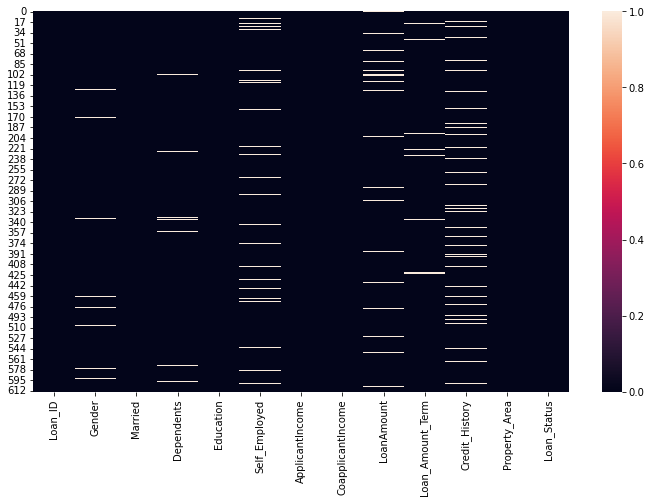

In [5]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isna())

In [6]:
# check datset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# check describe the dataset 
df.describe(include="object").T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
# # check the data unique values for data andataning
# for i in df.columns:
#     print(i)
#     print(df[i].unique())

# III. Missing values 
deal with missing values are tree option 
1. drop the null values aeche row 
2. set the values like (mean,mediun,mode)
3. opset values

In [10]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())


In [12]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#replace 3+ to 3
df["Dependents"] = df["Dependents"].replace("3+", 3)
#change the dtype as float
df["Dependents"] = df["Dependents"].astype(float)
# fillna values
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].median())

In [14]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# df.loc[((df["Credit_History"] != 1) & (df["Credit_History"] != 0))]

## IV. Data visualization.

In [16]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
# cat_col = df.describe(include="object").columns
cat_col = ['Married', 'Education', 'Self_Employed','Property_Area']

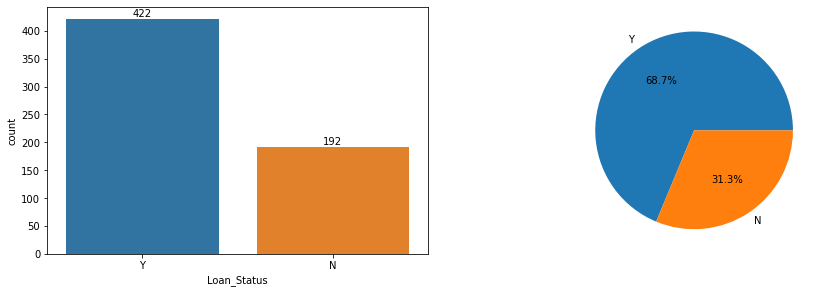

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)  
ax = sns.countplot(data=df,x="Loan_Status")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i)
    
plt.subplot(2,2,2)
plt.pie(df["Loan_Status"].value_counts(),labels=["Y","N"],autopct="%0.01f%%")
plt.show();

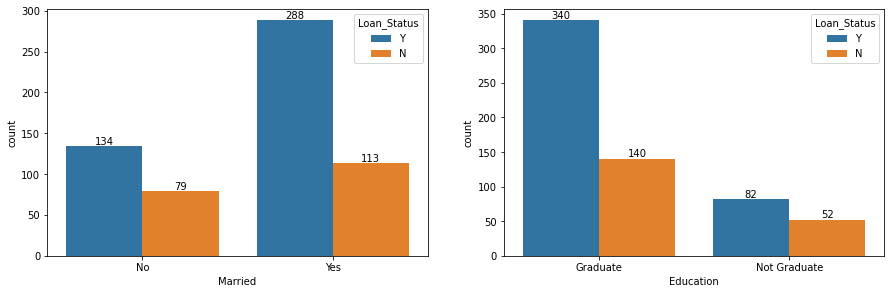

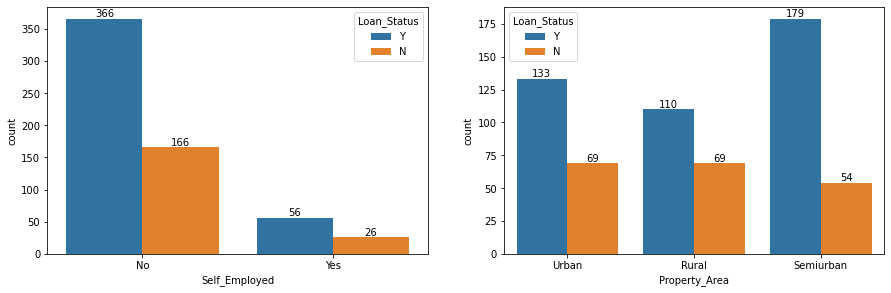

In [19]:

# visualize income columns and find the insight of the columns 
c = sns.color_palette(n_colors=4)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1) 
ax = sns.countplot(data=df,x="Married",hue="Loan_Status")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i)
    

plt.subplot(2,2,2) 
ax = sns.countplot(data=df,x="Education",hue="Loan_Status")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i);
    

# visualize income columns and find the insight of the columns 
c = sns.color_palette(n_colors=4)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1) 
ax = sns.countplot(data=df,x="Self_Employed",hue="Loan_Status")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i)
    

plt.subplot(2,2,2) 
ax = sns.countplot(data=df,x="Property_Area",hue="Loan_Status")
#plt.xticks(rotation=65)
for i in ax.containers:
    ax.bar_label(i);

In [20]:
# for i in df[cat_col]:
#     sns.countplot(df[i],hue=df["Loan_Status"])
#     plt.title(i)
#     plt.show(i)

In [21]:
# df.hist(bins=25,figsize=(15,10))
# plt.show()

In [22]:
# incodeing 
df["Loan_Status"] = df["Loan_Status"].replace({"Y":1,"N":0})

In [23]:
num_col = df.describe().columns
num_col

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]
[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]


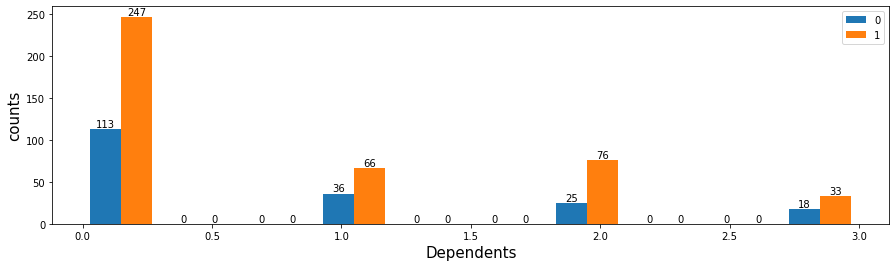

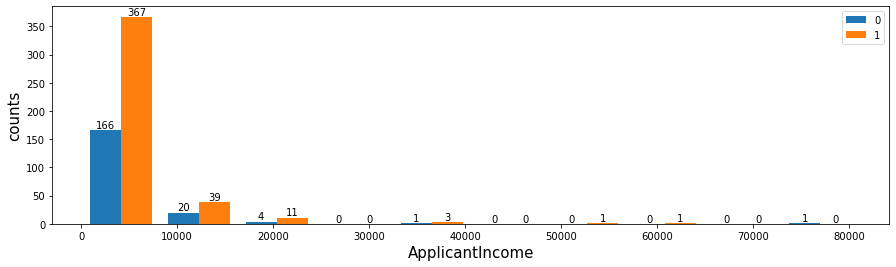

In [24]:
a_4 = df.loc[df["Loan_Status"]==0,"Dependents"]
b_4 = df.loc[df["Loan_Status"]==1,"Dependents"]
fig ,ax = plt.subplots(figsize=(15,4))
ax.hist([a_4,b_4],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Dependents",size=15)
    plt.ylabel("counts",size=15)
    plt.legend();
    
    
a_4 = df.loc[df["Loan_Status"]==0,"ApplicantIncome"]
b_4 = df.loc[df["Loan_Status"]==1,"ApplicantIncome"]
fig ,ax = plt.subplots(figsize=(15,4))
ax.hist([a_4,b_4],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("ApplicantIncome",size=15)
    plt.ylabel("counts",size=15)
    plt.legend();

[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]
[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]


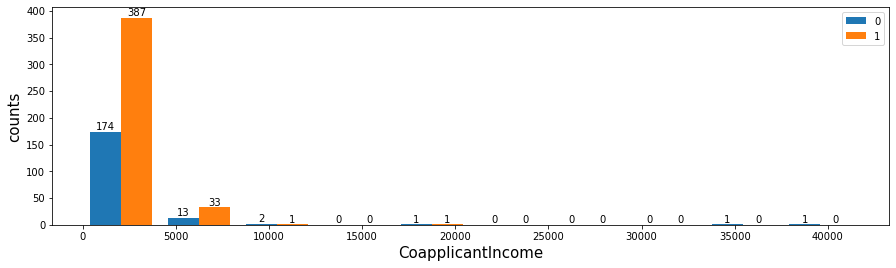

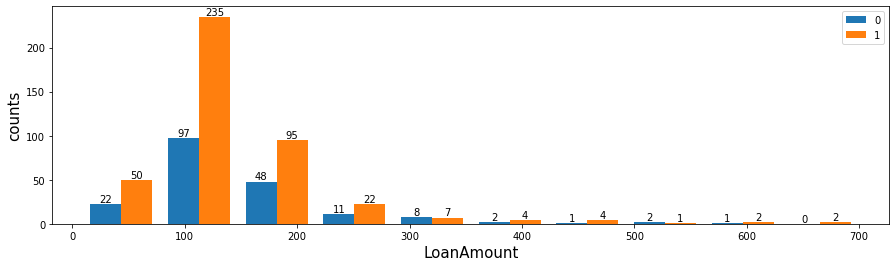

In [25]:
a_4 = df.loc[df["Loan_Status"]==0,"CoapplicantIncome"]
b_4 = df.loc[df["Loan_Status"]==1,"CoapplicantIncome"]
fig ,ax = plt.subplots(figsize=(15,4))
ax.hist([a_4,b_4],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("CoapplicantIncome",size=15)
    plt.ylabel("counts",size=15)
    plt.legend();

    
a_4 = df.loc[df["Loan_Status"]==0,"LoanAmount"]
b_4 = df.loc[df["Loan_Status"]==1,"LoanAmount"]
fig ,ax = plt.subplots(figsize=(15,4))
ax.hist([a_4,b_4],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("LoanAmount",size=15)
    plt.ylabel("counts",size=15)
    plt.legend();

[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]
[<BarContainer object of 10 artists>, <BarContainer object of 10 artists>]


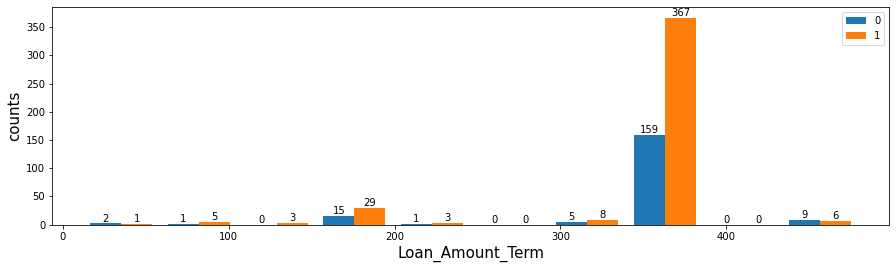

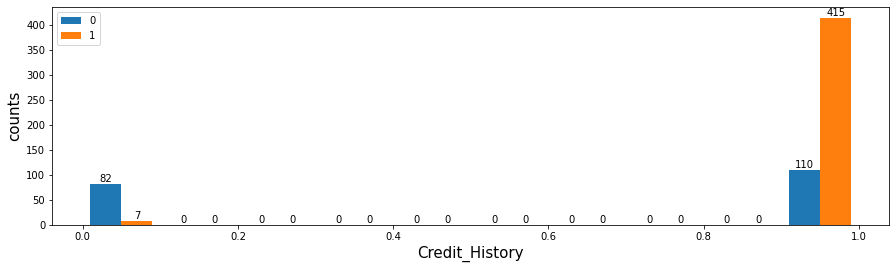

In [26]:
a_4 = df.loc[df["Loan_Status"]==0,"Loan_Amount_Term"]
b_4 = df.loc[df["Loan_Status"]==1,"Loan_Amount_Term"]
fig ,ax = plt.subplots(figsize=(15,4))
ax.hist([a_4,b_4],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Loan_Amount_Term",size=15)
    plt.ylabel("counts",size=15)
    plt.legend();

    
a_4 = df.loc[df["Loan_Status"]==0,"Credit_History"]
b_4 = df.loc[df["Loan_Status"]==1,"Credit_History"]
fig ,ax = plt.subplots(figsize=(15,4))
ax.hist([a_4,b_4],label=[0,1])

con = ax.containers
print(con)

[f'ax.{fn}' for fn in dir(ax) if 'contain' in fn.lower()]

for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Credit_History",size=15)
    plt.ylabel("counts",size=15)
    plt.legend();

### OrdinalEncoder

In [27]:
cat_cols = df.describe(include="object").columns

from sklearn.preprocessing import OrdinalEncoder

encoding = OrdinalEncoder()
df[cat_cols] = encoding.fit_transform(df[cat_cols])


In [28]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0


In [29]:
normalization_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

### Normalization
Normalizationis the process of organizing data in a database. It includes creating tables and establishing relationships between those tables according to rules designed both to protect the data and to make the database more flexible by eliminating redundancy and inconsistent dependency

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[normalization_cols] = scaler.fit_transform(df[normalization_cols]) 

In [31]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,0.072991,-0.554487,-0.211241,0.273231,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0.0,0


## correlation between variables

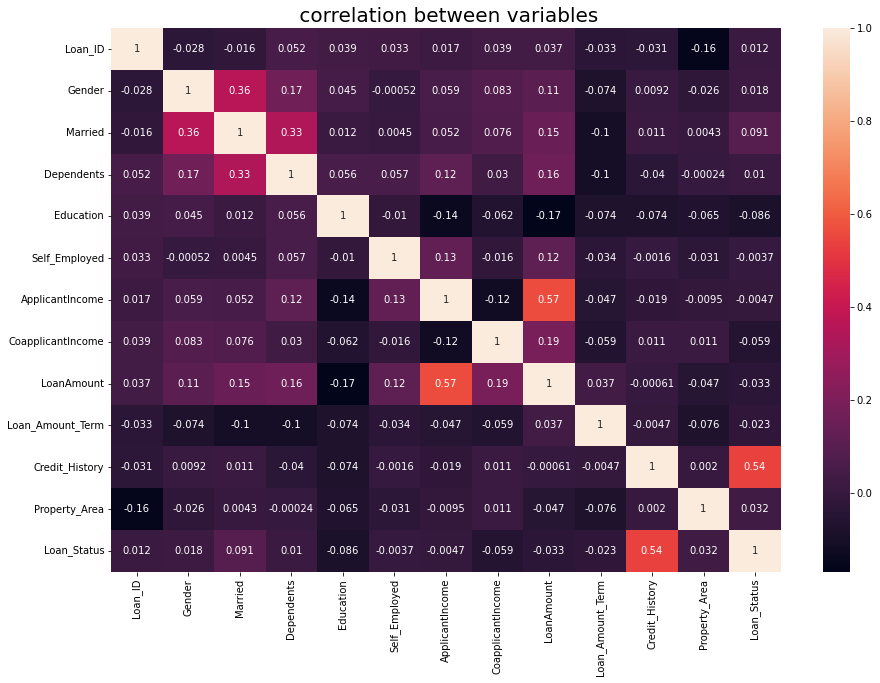

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title(" correlation between variables" ,size=20)
plt.show()

# V.  Independent and Dependent defined x, y

In [33]:
x = df.iloc[:,:-1]
y = df["Loan_Status"]


## Train_Test_Split

In [34]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.20,random_state=43)
print(xtrain.shape)
print(xtest.shape)

(491, 12)
(123, 12)


# VI.  Model Building

### 1. LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


LR = LogisticRegression()
LR.fit(xtrain,ytrain)


y_pred = LR.predict(xtest)


print(confusion_matrix(ytest,y_pred))
print("--"*28)
print(classification_report(ytest,y_pred))

[[17 21]
 [ 2 83]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



In [36]:
ytest[:10]

330    1
145    1
190    1
127    1
291    0
572    1
404    0
423    0
180    0
24     0
Name: Loan_Status, dtype: int64

In [37]:
y_pred[:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

<AxesSubplot:>

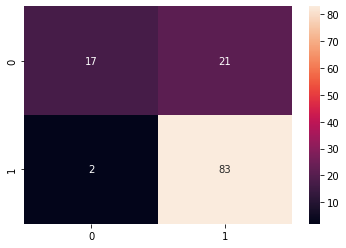

In [38]:
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True)

### 2. RandomForestClassifier with GridSearchCV

In [39]:
from sklearn.ensemble import RandomForestClassifier


para = {"n_estimators":[int(x) for x in np.linspace(start=10, stop=100,num=10)],
       "max_depth":[2,5],
       "max_features":["sqrt","auto"],
       "min_samples_split":[2,4],
       "min_samples_leaf":[1,3],
       "bootstrap":[True,False]};


R_forest = RandomForestClassifier()

In [40]:
from sklearn.model_selection import GridSearchCV

gred_cv = GridSearchCV(R_forest,param_grid=para,cv=5,verbose=1,n_jobs=-1)
gred_cv.fit(xtrain,ytrain)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 5],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=1)

In [41]:
print(gred_cv.best_params_)
print(gred_cv.best_score_)

{'bootstrap': False, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}
0.8146361574933003


In [64]:
R_forest = RandomForestClassifier(n_estimators=30,
                                  max_depth=5,
                                  max_features="auto",
                                  min_samples_split=2,
                                  min_samples_leaf=3,
                                  bootstrap=False)
R_forest.fit(xtrain,ytrain)
y_pred = R_forest.predict(xtest)


print(confusion_matrix(ytest,y_pred))
print("--"*28)
print(classification_report(ytest,y_pred))

[[16 22]
 [ 3 82]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.42      0.56        38
           1       0.79      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.69      0.71       123
weighted avg       0.81      0.80      0.77       123



# VII Load Test Dataset

In [65]:
test_df = pd.read_csv(r"C:\Users\Dell\Downloads\hacthon loan prediction\test_lAUu6dG.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [66]:
test_df.duplicated().sum()

0

In [67]:
#check missing values
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [68]:
# replace and fillna values
test_df["Gender"] = test_df["Gender"].fillna(test_df["Gender"].mode()[0])
test_df["Self_Employed"] = test_df["Self_Employed"].fillna(test_df["Self_Employed"].mode()[0])
test_df["LoanAmount"] = test_df["LoanAmount"].fillna(test_df["LoanAmount"].median())
test_df["Loan_Amount_Term"] = test_df["Loan_Amount_Term"].fillna(test_df["Loan_Amount_Term"].median())
test_df["Credit_History"] = test_df["Credit_History"].fillna(test_df["Credit_History"].median())

In [69]:
#replace 3+ to 3
test_df["Dependents"] = test_df["Dependents"].replace("3+", 3)
#change the dtype as float
test_df["Dependents"] = test_df["Dependents"].astype(float)
# fillna values
test_df["Dependents"] = test_df["Dependents"].fillna(test_df["Dependents"].median())

In [70]:
# test_df.isna().sum()

In [71]:
#copy test dataset new variable
text_data = test_df.copy()

In [72]:
#Data preprocessing
cat_cols = text_data.describe(include="object").columns

from sklearn.preprocessing import OrdinalEncoder

encoding = OrdinalEncoder()
text_data[cat_cols] = encoding.fit_transform(text_data[cat_cols])

In [73]:
#Data normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
text_data[normalization_cols] = scaler.fit_transform(text_data[normalization_cols])

In [74]:
text_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,1.0,0.0,0.0,0.0,0.186461,-0.673335,-0.426780,0.266022,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,-0.352692,-0.029848,-0.163953,0.266022,1.0,2.0


# VIII. Testing the model

In [75]:
from sklearn.ensemble import RandomForestClassifier

R_forest = RandomForestClassifier(n_estimators=30,
                                  max_depth=5,
                                  max_features="auto",
                                  min_samples_split=2,
                                  min_samples_leaf=3,
                                  bootstrap=False)
R_forest.fit(xtrain,ytrain)
test_pred = R_forest.predict(text_data)


# print(confusion_matrix(ytest,y_pred))
# print("--"*28)
# print(classification_report(ytest,y_pred))

In [76]:
#prediction values
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [77]:
#defind the dataframe prediction values
pred = pd.DataFrame(test_pred,columns=["Loan_Status"])

In [78]:
#marge prediction values
final_testdata_preddtion = pd.concat([test_df,pred],axis=1)

In [79]:
final_testdata_preddtion.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [80]:
final_testdata_preddtion["Loan_Status"].value_counts()

1    303
0     64
Name: Loan_Status, dtype: int64

In [81]:
final_testdata_preddtion[["Loan_ID","Loan_Status"]].head(2)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1


In [82]:
final_Submission = final_testdata_preddtion[["Loan_ID","Loan_Status"]]

In [83]:
final_Submission["Loan_Status"] = final_Submission["Loan_Status"].replace({0:"N",1:"Y"})

In [84]:
final_Submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [85]:
#save to excel.csv format
final_Submission.to_csv("final_Submission.csv",index=False)